# Practical 9: k-NN, Decision Trees, Random Forests

## Nearest Neighbors

sklearn.neighbors provides functionality for unsupervised and supervised
neighbors-based learning methods. Unsupervised nearest neighbors is the
foundation of many other learning methods, notably manifold learning and
spectral clustering. Supervised neighbors-based learning comes in two
flavors: classification for data with discrete labels, and
regression for data with continuous labels.

The principle behind nearest neighbor methods is to find a predefined
number of training samples closest in distance to the new point, and
predict the label from these. The number of samples can be a
user-defined constant (k-nearest neighbor learning), or vary based on
the local density of points (radius-based neighbor learning). The
distance can, in general, be any metric measure: standard Euclidean
distance is the most common choice. Neighbors-based methods are known as
*non-generalizing* machine learning methods, since they simply
"remember" all of its training data (possibly transformed into a fast
indexing structure such as a Ball Tree &lt;ball\_tree&gt; or
KD Tree &lt;kd\_tree&gt;).

Despite its simplicity, nearest neighbors has been successful in a large
number of classification and regression problems, including handwritten
digits and satellite image scenes. Being a non-parametric method, it is
often successful in classification situations where the decision
boundary is very irregular.

### Nearest Neighbors Classification

Neighbors-based classification is a type of *instance-based learning* or
*non-generalizing learning*: it does not attempt to construct a general
internal model, but simply stores instances of the training data.
Classification is computed from a simple majority vote of the nearest
neighbors of each point: a query point is assigned the data class which
has the most representatives within the nearest neighbors of the point.

scikit-learn implements two different nearest neighbors classifiers:
KNeighborsClassifier implements learning based on the $k$ nearest
neighbors of each query point, where $k$ is an integer value specified
by the user. RadiusNeighborsClassifier implements learning based on the
number of neighbors within a fixed radius $r$ of each training point,
where $r$ is a floating-point value specified by the user.

The $k$-neighbors classification in KNeighborsClassifier is the most
commonly used technique. The optimal choice of the value $k$ is highly
data-dependent: in general a larger $k$ suppresses the effects of noise,
but makes the classification boundaries less distinct.

In cases where the data is not uniformly sampled, radius-based neighbors
classification in RadiusNeighborsClassifier can be a better choice. The
user specifies a fixed radius $r$, such that points in sparser
neighborhoods use fewer nearest neighbors for the classification. For
high-dimensional parameter spaces, this method becomes less effective
due to the so-called "curse of dimensionality".

The basic nearest neighbors classification uses uniform weights: that
is, the value assigned to a query point is computed from a simple
majority vote of the nearest neighbors. Under some circumstances, it is
better to weight the neighbors such that nearer neighbors contribute
more to the fit. This can be accomplished through the `weights` keyword.
The default value, `weights = 'uniform'`, assigns uniform weights to
each neighbor. `weights = 'distance'` assigns weights proportional to
the inverse of the distance from the query point. Alternatively, a
user-defined function of the distance can be supplied to compute the
weights.

In [1]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# import some data to play with
iris = datasets.load_iris()

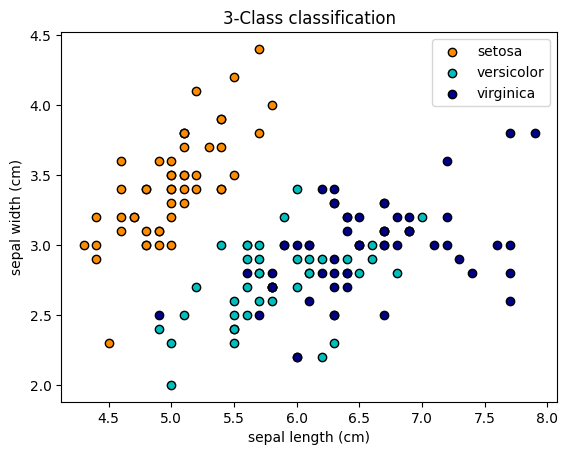

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

# Plot also the training points
for i in range(3):
    plt.scatter(X[:, 0][y==i], X[:, 1][y==i], c=cmap_bold[i], edgecolor='black', label=iris.target_names[i])
plt.title("3-Class classification")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()

plt.show()

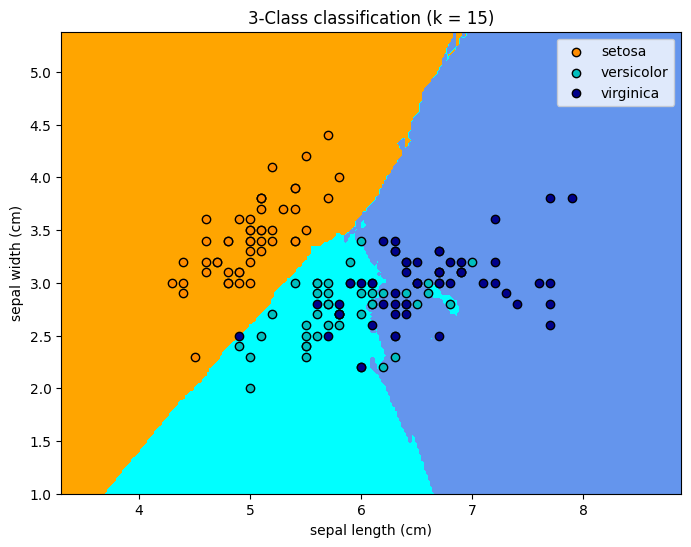

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']


# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for i in range(3):
    plt.scatter(X[:, 0][y==i], X[:, 1][y==i], c=cmap_bold[i], edgecolor='black', label=iris.target_names[i])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"
          % (n_neighbors))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()

plt.show()

## Adaptive Basis Function Models
### Decision Trees and Random Forests
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

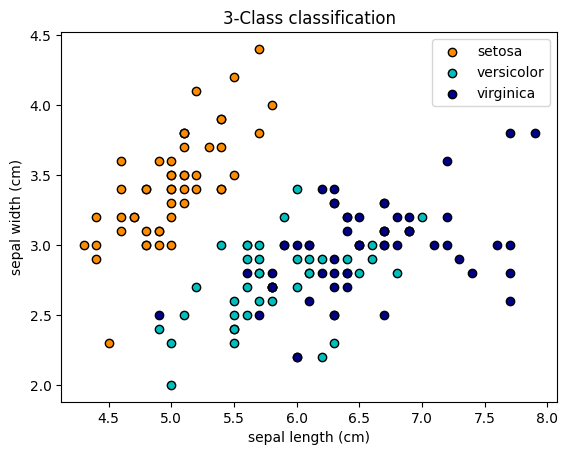

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

# Plot also the training points
for i in range(3):
    plt.scatter(X[:, 0][y==i], X[:, 1][y==i], c=cmap_bold[i], edgecolor='black', label=iris.target_names[i])
plt.title("3-Class classification")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()

plt.show()

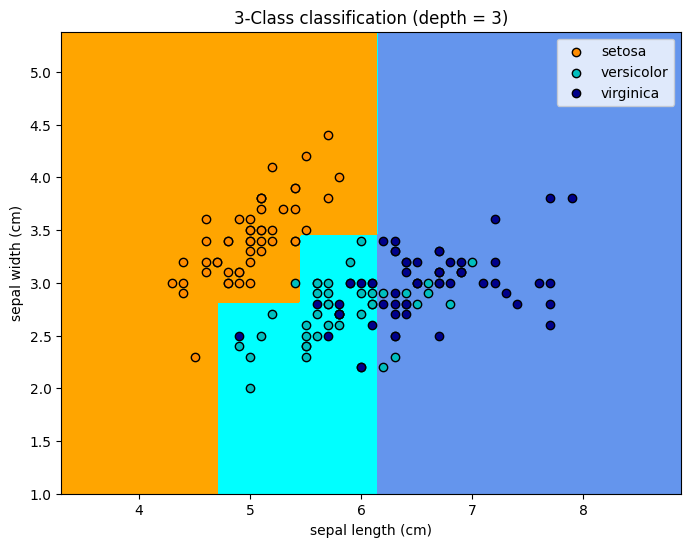

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.tree import DecisionTreeClassifier

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']


# we create an instance of DecisionTreeClassifier and fit the data.
max_depth = 3
clf = DecisionTreeClassifier(max_depth=max_depth)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for i in range(3):
    plt.scatter(X[:, 0][y==i], X[:, 1][y==i], c=cmap_bold[i], edgecolor='black', label=iris.target_names[i])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (depth = {max_depth})")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()

plt.show()

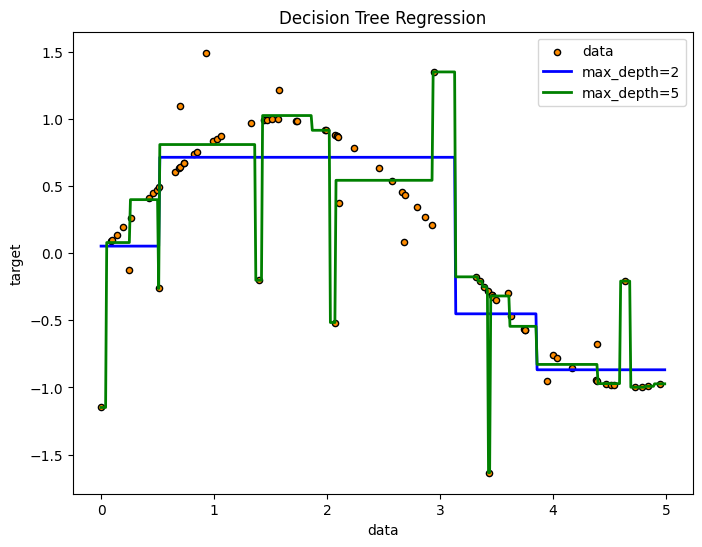

In [7]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="blue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="green", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Some advantages of decision trees are:

  - Simple to understand and to interpret. Trees can be visualised.


  - The cost of using the tree (i.e., predicting data) is logarithmic in the
      number of data points used to train the tree.

  - Able to handle both numerical and categorical data. However scikit-learn
      implementation does not support categorical variables for now. Other
      techniques are usually specialised in analysing datasets that have only one type
      of variable. 

  - Able to handle multi-output problems.

  - Uses a white box model. If a given situation is observable in a model,
      the explanation for the condition is easily explained by boolean logic.
      By contrast, in a black box model (e.g., in an artificial neural
      network), results may be more difficult to interpret.

  - Possible to validate a model using statistical tests. That makes it
      possible to account for the reliability of the model.

  - Performs well even if its assumptions are somewhat violated by
      the true model from which the data were generated.


The disadvantages of decision trees include:

  - Decision-tree learners can create over-complex trees that do not
      generalise the data well. This is called overfitting. Mechanisms
      such as pruning, setting the minimum number of samples required
      at a leaf node or setting the maximum depth of the tree are
      necessary to avoid this problem.

  - Decision trees can be unstable because small variations in the
      data might result in a completely different tree being generated.
      This problem is mitigated by using decision trees within an
      ensemble.

  - Predictions of decision trees are neither smooth nor continuous, but
      piecewise constant approximations as seen in the above figure. Therefore,
      they are not good at extrapolation.

  - The problem of learning an optimal decision tree is known to be
      NP-complete under several aspects of optimality and even for simple
      concepts. Consequently, practical decision-tree learning algorithms
      are based on heuristic algorithms such as the greedy algorithm where
      locally optimal decisions are made at each node. Such algorithms
      cannot guarantee to return the globally optimal decision tree.  This
      can be mitigated by training multiple trees in an ensemble learner,
      where the features and samples are randomly sampled with replacement.

  - There are concepts that are hard to learn because decision trees
      do not express them easily, such as XOR, parity or multiplexer problems.

  - Decision tree learners create biased trees if some classes dominate.
      It is therefore recommended to balance the dataset prior to fitting
      with the decision tree.

## Understanding the decision tree structure in scikit-learn

The decision tree structure can be analysed to gain further insight on the
relation between the features and the target to predict. In this example, we
show how to retrieve:

- the binary tree structure;
- the depth of each node and whether or not it's a leaf;
- the nodes that were reached by a sample using the ``decision_path`` method;
- the leaf that was reached by a sample using the apply method;
- the rules that were used to predict a sample;
- the decision path shared by a group of samples.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import tree

## Train tree classifier
First, we fit a :class:`~sklearn.tree.DecisionTreeClassifier` using the
:func:`~sklearn.datasets.load_iris` dataset.



In [9]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=None, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

## Tree structure

The decision classifier has an attribute called ``tree_`` which allows access
to low level attributes such as ``node_count``, the total number of nodes,
and ``max_depth``, the maximal depth of the tree. It also stores the
entire binary tree structure, represented as a number of parallel arrays. The
i-th element of each array holds information about the node ``i``. Node 0 is
the tree's root. Some of the arrays only apply to either leaves or split
nodes. In this case the values of the nodes of the other type is arbitrary.
For example, the arrays ``feature`` and ``threshold`` only apply to split
nodes. The values for leaf nodes in these arrays are therefore arbitrary.

Among these arrays, we have:

  - ``children_left[i]``: id of the left child of node ``i`` or -1 if leaf
    node
  - ``children_right[i]``: id of the right child of node ``i`` or -1 if leaf
    node
  - ``feature[i]``: feature used for splitting node ``i``
  - ``threshold[i]``: threshold value at node ``i``
  - ``n_node_samples[i]``: the number of of training samples reaching node
    ``i``
  - ``impurity[i]``: the impurity at node ``i``

Using the arrays, we can traverse the tree structure to compute various
properties. Below, we will compute the depth of each node and whether or not
it is a leaf.



In [10]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))

The binary tree structure has 9 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 6.
		node=3 is a split node: go to node 4 if X[:, 3] <= 1.6500000357627869 else to node 5.
			node=4 is a leaf node.
			node=5 is a leaf node.
		node=6 is a split node: go to node 7 if X[:, 2] <= 5.049999952316284 else to node 8.
			node=7 is a leaf node.
			node=8 is a leaf node.


We can compare the above output to the plot of the decision tree.



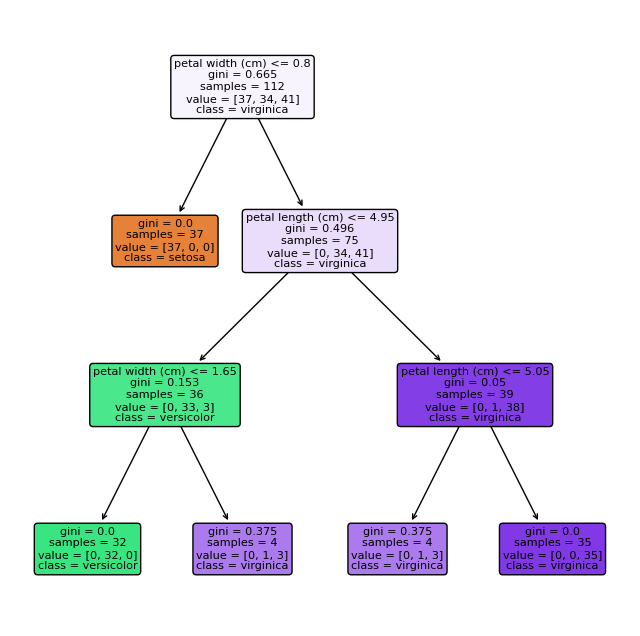

In [11]:
plt.figure(figsize=(8,8))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

## Decision path

We can also retrieve the decision path of samples of interest. The
``decision_path`` method outputs an indicator matrix that allows us to
retrieve the nodes the samples of interest traverse through. A non zero
element in the indicator matrix at position ``(i, j)`` indicates that
the sample ``i`` goes through the node ``j``. Or, for one sample ``i``, the
positions of the non zero elements in row ``i`` of the indicator matrix
designate the ids of the nodes that sample goes through.

The leaf ids reached by samples of interest can be obtained with the
``apply`` method. This returns an array of the node ids of the leaves
reached by each sample of interest. Using the leaf ids and the
``decision_path`` we can obtain the splitting conditions that were used to
predict a sample or a group of samples. First, let's do it for one sample.
Note that ``node_index`` is a sparse matrix.



In [12]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)
node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample {id}:\n'.format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision node {node} : (X_test[{sample}, {feature}] = {value}) "
          "{inequality} {threshold})".format(
              node=node_id,
              sample=sample_id,
              feature=feature[node_id],
              value=X_test[sample_id, feature[node_id]],
              inequality=threshold_sign,
              threshold=threshold[node_id]))

Rules used to predict sample 0:

decision node 0 : (X_test[0, 3] = 2.4) > 0.800000011920929)
decision node 2 : (X_test[0, 2] = 5.1) > 4.950000047683716)


For a group of samples, we can determine the common nodes the samples go
through.




# Post pruning decision trees with cost complexity pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Minimal cost-complexity pruning is an algorithm used to prune a tree to
avoid over-fitting. This algorithm
is parameterized by $\alpha\ge0$ known as the complexity parameter. The
complexity parameter is used to define the cost-complexity measure,
$R_\alpha(T)$ of a given tree $T$:

$$R_\alpha(T) = R(T) + \alpha|\widetilde{T}|$$

where $|\widetilde{T}|$ is the number of terminal nodes in $T$ and
$R(T)$ is traditionally defined as the total misclassification rate of
the terminal nodes. Alternatively, scikit-learn uses the total sample
weighted impurity of the terminal nodes for $R(T)$. Minimal cost-complexity
pruning finds the subtree of $T$ that minimizes $R_\alpha(T)$.

The cost complexity measure of a single node is
$R_\alpha(n)=R(n)+\alpha$. The branch, $T_n$, is defined to be a tree
where node $n$ is its root. In general, the impurity of a node is
greater than the sum of impurities of its terminal nodes, $R(T_n)<R(n)$.
However, the cost complexity measure of a node, $n$, and its branch,
$T_n$, can be equal depending on $\alpha$. We define the effective
$\alpha$ of a node to be the value where they are equal,
$R_\alpha(T_n)=R_\alpha(n)$ or
$\alpha_{eff}(n)=\frac{R(n)-R(T_n)}{|T|-1}$. A non-terminal node with
the smallest value of $\alpha_{eff}$ is the weakest link and will be
pruned. This process stops when the pruned tree's minimal $\alpha_{eff}$
is greater than the `ccp_alpha` parameter.


In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

## Total impurity of leaves vs effective alphas of pruned tree
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
:func:`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.



In [14]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In the following plot, the maximum effective alpha value is removed, because
it is the trivial tree with only one node.



Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

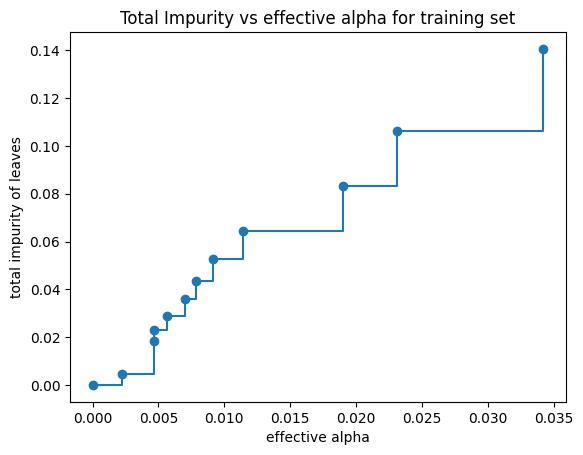

In [15]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.



In [16]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


For the remainder of this example, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.



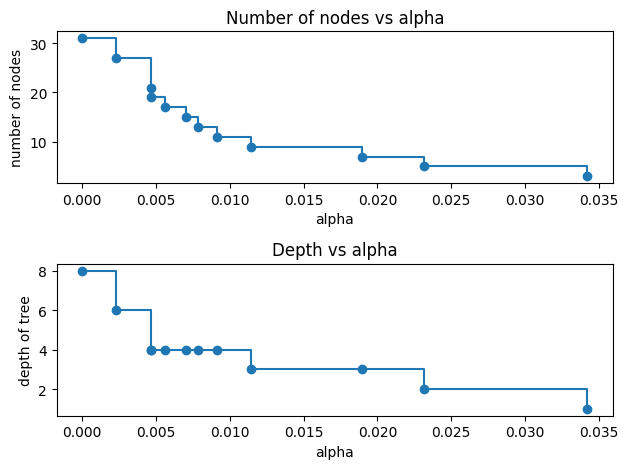

In [17]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Accuracy vs alpha for training and testing sets
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of :class:`DecisionTreeClassifier`, the tree overfits, leading to
a 100% training accuracy and 88% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.
In this example, setting ``ccp_alpha=0.015`` maximizes the testing accuracy.



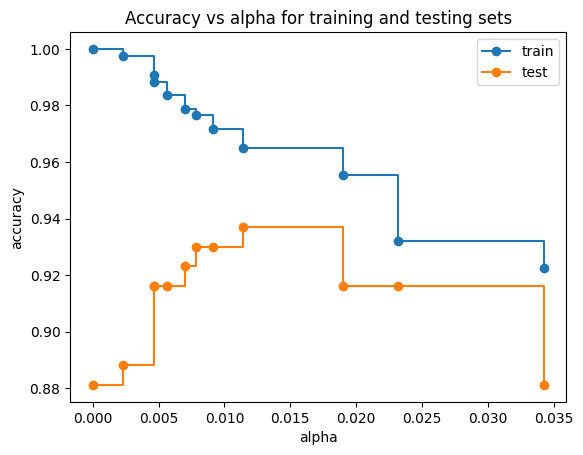

In [18]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# Random forests

In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size `max_features`. 

The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

The scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.

## Parameters
The main parameters to adjust when using these methods is ``n_estimators`` and
``max_features``. The former is the number of trees in the forest. The larger
the better, but also the longer it will take to compute. In addition, note that
results will stop getting significantly better beyond a critical number of
trees. The latter is the size of the random subsets of features to consider
when splitting a node. The lower the greater the reduction of variance, but
also the greater the increase in bias. Empirical good default values are
``max_features=None`` (always considering all features instead of a random
subset) for regression problems, and ``max_features="sqrt"`` (using a random
subset of size ``sqrt(n_features)``) for classification tasks (where
``n_features`` is the number of features in the data). Good results are often
achieved when setting ``max_depth=None`` in combination with
``min_samples_split=2`` (i.e., when fully developing the trees). Bear in mind
though that these values are usually not optimal, and might result in models
that consume a lot of RAM. The best parameter values should always be
cross-validated. 

# Decision surface comparison
Plot the decision surfaces of forests of randomized trees trained on pairs of
features of the iris dataset.

This plot compares the decision surfaces learned by a decision tree classifier
(first column), by a random forest classifier (second column), by an AdaBoost 
classifier (third column) and by a Stacking classifier consisting of Logistic
Regression, Random Forests and K-Nearest Neighbors classsifiers (fourth column).

In the first row, the classifiers are built using the sepal width and
the sepal length features only, on the second row using the petal length and
sepal length only, and on the third row using the petal width and the
petal length only.


DecisionTree with features [0, 1] has a score of 0.9266666666666666
RandomForest with 30 estimators with features [0, 1] has a score of 0.9266666666666666
KNeighbors with features [0, 1] has a score of 0.8333333333333334
DecisionTree with features [0, 2] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [0, 2] has a score of 0.9933333333333333
KNeighbors with features [0, 2] has a score of 0.94
DecisionTree with features [2, 3] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [2, 3] has a score of 0.9933333333333333
KNeighbors with features [2, 3] has a score of 0.96


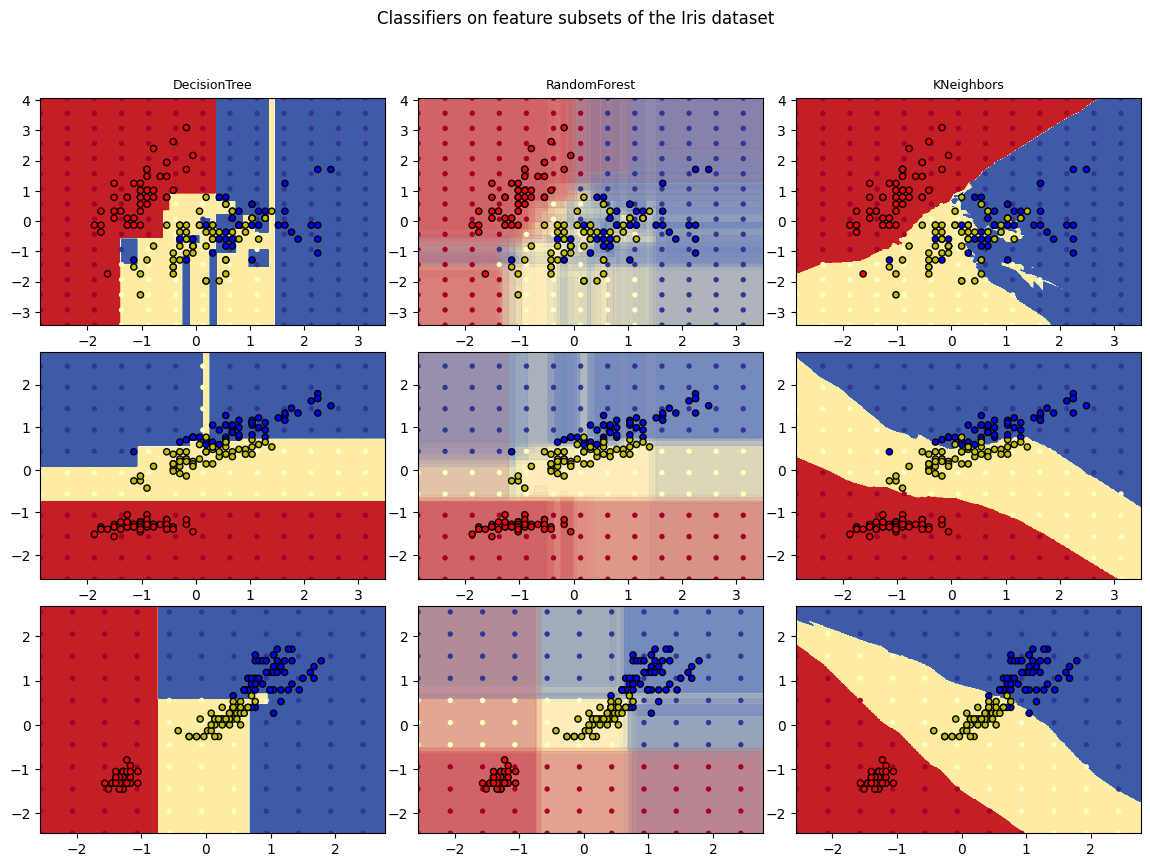

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegressionCV

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1


models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
         KNeighborsClassifier(10)]
plt.figure(figsize=(4*3, 3*3))
for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)

        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier) or isinstance(model, KNeighborsClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()